In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разминка (4 балла)

## 1.1 Создание матриц (0.25 балла)

Создайте 4 матрицы
- A - "шахматную" из нулей и единиц, размера 6 на 3, левое верхнее значение (A[0][0]) равно 1,
- В - из чисел от 1 до 24, записанных в виде змейки, размера 6 на 4,
- C - из случайных целых чисел от 2 до 10 (обе границы включительно), размера 4 на 3
- D - из нулей с единичками на главной диагонали, размера 4 на 4.

**Создайте из этих матриц "лоскутную" матрицу S**

A В

С D

используя **только стандартные** операции numpy. Comprehensions использовать нельзя.

После этого допишите к полученной матрице S матрицу F размера 10 на 2 из нулей, чтобы получилась матрица G:

S F

P.S. Когда мы говорим, что матрица имеет размер x на y, x - количество строк, y - количество столбцов.

In [ ]:
A = np.zeros((6, 3), dtype=int)
A[::2, ::2] = 1
A[1::2, 1::2] = 1

B = np.arange(1, 25).reshape((6, 4))

C = np.random.randint(2, 11, size=(4, 3))

D = np.eye(4, dtype=int)

S_top = np.hstack((A, B))
S_bottom = np.hstack((C, D))
S = np.vstack((S_top, S_bottom))

F = np.zeros((10, 2), dtype=int)
G = np.hstack((S, F))

print("Матрица S:")
print(S)
print("\nМатрица G:")

Матрица S:
[[ 1  0  1  1  2  3  4]
 [ 0  1  0  5  6  7  8]
 [ 1  0  1  9 10 11 12]
 [ 0  1  0 13 14 15 16]
 [ 1  0  1 17 18 19 20]
 [ 0  1  0 21 22 23 24]
 [ 2  7  9  1  0  0  0]
 [ 7  4  4  0  1  0  0]
 [ 6  7 10  0  0  1  0]
 [ 2  8  3  0  0  0  1]]

Матрица G:


## 1.2 Поиск ближайшего соседа (0.25 балла)

Реализуйте функцию, принимающую на вход матрицу X и некоторое число a и возвращающую ближайший к числу элемент матрицы.
Например, для X = np.arange(0,10).reshape((2, 5)) и a = 3.6 ответом будет 4. Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

In [ ]:
def find_nearest_neighbour(X, a):
       # Вычисляем разницу между каждым элементом и a
    diff = np.abs(X - a)
    #индекс минимальной разницы
    idx = np.argmin(diff)
    # возвращаем элемент, соответствующий разнице
    return X.flat[idx]

X = np.arange(10).reshape((2, 5))
a = 3.6
print(find_nearest_neighbour(X, a))

4


## 1.3 Очень странная нейросеть (0.25 балла)

Реализуйте одну очень странную нейросеть. Нейросеть должна:

- Возводить матрицу A (матрицу весов) размера N x N в квадрат
- В качестве первого преобразования умножать вектор X длины N (вектор признаков) на матрицу весов A**2 (на выходе получается новый вектор);
- В качестве второго преобразования умножать вектор, полученный на прошлом шаге, на вектор b (вектор весов) размера N (на выходе получается скалярное число).

Считаем, что все числа (элементы матриц и векторов) - числа с плавающей точкой.

In [ ]:
N = 4
A = np.array([[1.0, 2.0, 3.0, 4.0],
              [5.0, 6.0, 7.0, 8.0],
              [9.0, 10.0, 11.0, 12.0],
              [13.0, 14.0, 15.0, 16.0]])
b = np.array([1.0, 2.0, 3.0, 4.0])
X = np.array([0.5, 1.5, 2.5, 3.5])

def very_strange_neural_network(A, b, X):
    # Возводим матрицу A в квадрат
    A_squared = np.dot(A, A)

    # Первое преобразование: умножаем вектор X на матрицу A_squared
    result_vector = np.dot(A_squared, X)

    # Второе преобразование: умножаем полученный вектор на вектор b
    scalar_result = np.dot(result_vector, b)

    return scalar_result

print(very_strange_neural_network(A, b, X))

32260.0


## 1.4 Джунгли зовут! (0.25 балла)

Перед вами матрица M - карта местности тяжелопроходимых джунглей, составленная Ларой Крофт. На карте каждая ячейка - целое число, обозначающее высоту над уровнем моря (если число больше нуля) в метрах или глубину моря (если число меньше нуля) в метрах в данной ячейке карты размером метр на метр. Если число 0, то это часть суши - берег.


Вам необходимо посчитать:
- Общую площадь клеточек моря, в которых его глубина больше 5 (в м^2)
- Общий объём всей воды на карте (в м^3)
- Максимальную высоту над уровнем моря, которая есть на этой карте (в м)

In [ ]:
def find_deep_sea_area(M):
    return np.sum(M < -5)

def find_water_volume(M):
    return np.sum(np.abs(M[M < 0]))

def find_max_height(M):
    return np.max(M)

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.isclose(find_deep_sea_area(M), 1)
assert np.isclose(find_water_volume(M), 21)
assert np.isclose(find_max_height(M), 25)

print("Общая площадь моря на карте -", find_deep_sea_area(M), "м^2")
print("Общий объем воды на карте -", find_water_volume(M), "м^3")
print("Максимальный уровень над уровнем моря на карте -", find_max_height(M), "м")

Общая площадь моря на карте - 1 м^2
Общий объем воды на карте - 21 м^3
Максимальный уровень над уровнем моря на карте - 25 м


## 1.5 Острова сокровищ (0.25 балла)


На вход функции подаётся массив a из нулей и единиц. Необходимо посчитать, сколько в массиве есть блоков из идущих подряд единиц (островков). Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.diff`

In [ ]:
def count_all_islands(a):
    diff = np.diff(a)
    start_points = np.where(diff == 1)[0]
    end_points = np.where(diff == -1)[0]

    if a[0] == 1:
        start_points = np.insert(start_points, 0, -1)

    if a[-1] == 1:
        end_points = np.append(end_points, len(a) - 1)

    return len(start_points)

In [ ]:
# можно подставить свой пример

a = np.array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

# простая проверка для примера выше
assert count_all_islands(a) == 4
print(count_all_islands(a))

4


## 1.6 Маскарад (0.25 балла)

На вход идёт 2-мерная матрица X, заполненная числами с плавающей точкой, и дробное число a. Нужно заменить все ячейки в матрице, которые больше, чем а, на среднее значение среди элементов матрицы Х.

**Нужно** пользоваться базовыми функциями numpy, **нельзя** пользоваться циклами.

In [ ]:
def swap_mask_for_average(X, a):
    avg = X.mean()
    X[X > a] = avg
    return X

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])
a = 5

# простая проверка для примера выше
assert np.allclose(swap_mask_for_average(M, a),
                   np.array([
                       [-7, -3, -1, 0],
                       [-4, -3, 1, 2],
                       [-2, 0, 4, 2],
                       [-1, 3, 2, 2]
                   ]))

swap_mask_for_average(M, a)

array([[-7, -3, -1,  0],
       [-4, -3,  1,  2],
       [-2,  0,  4,  2],
       [-1,  3,  2,  2]])

## 1.7 По горячим трейсам (0.25 балла)

На вход приходит квадратная матрица М, надо посчитать разницу между суммой по главной и побочной диагоналями матрицы.


Можно пользоваться только базовыми функциями numpy, циклами пользоваться **нельзя**.

Подсказка: посмотрите, что такое `np.trace`

In [ ]:
def count_trace_diff(M):
    main_diag_sum = np.trace(M)
    anti_diag_sum = np.trace(np.fliplr(M))
    return main_diag_sum - anti_diag_sum

In [ ]:
# Можно подставить свой пример
M = np.array([
    [-7, -3, -1, 0],
    [-4, -3, 1, 19],
    [-2, 0, 4, 25],
    [-1, 3, 6, 9]
])

# простая проверка для примера выше
assert np.allclose(count_trace_diff(M), 3)

count_trace_diff(M)

3

## 1.8 Царь горы (0.25 балла)

На вход приходит вектор a размера N. Необходимо при помощи сложения, конкатенации, бродкастинга получить симметричную матрицу размера 2N x 2N, у которой в середине максимальное значение, а к краям оно убывает.

Пример: a = (0, 1, 2)

Результат:

0 1 2 2 1 0 \\
1 2 3 3 2 1 \\
2 3 4 4 3 2 \\
2 3 4 4 3 2 \\
1 2 3 3 2 1 \\
0 1 2 2 1 0 \\

In [ ]:
def create_mountain(a):
    N = len(a)
    top = np.maximum.outer(a, a)
    bottom = top[::-1]
    mountain = np.vstack((top, bottom))
    print(mountain)

In [ ]:
# Можно подставить свой пример
a = np.array([0, 1, 2, 3, 4])

create_mountain(a)

## 1.9 Монохромная фотография 9 на 12 (0.5 балла)

На вход приходит двухмерная матрица P размера N на M, заполненная числами от 0 до 255, соответствующая некой черно-белой фотографии и натуральное число C. Необходимо из неё получить матрицу размера (N-C + 1) x (M-C+1), где каждая ячейка - среднее значение соответствующей подматрицы размера C x C. Таким образом, по сути, мы сделаем примитивное размытие изображения (и немного потеряем в его размере)

In [ ]:
def custom_blur(P, C):
    N, M = P.shape
    result = np.zeros((N - C + 1, M - C + 1))

    for i in range(N - C + 1):
        for j in range(M - C + 1):
            sub_matrix = P[i:i+C, j:j+C]
            result[i, j] = np.mean(sub_matrix)

    return result

In [ ]:
# можно подставить свой пример
P = np.arange(0, 12).reshape((3, 4))
kernel = 2

# простая проверка для примера выше
assert np.allclose(custom_blur(P, kernel),
                   np.array([[2.5, 3.5, 4.5], [6.5, 7.5, 8.5]]))
custom_blur(P, 2 )

array([[2.5, 3.5, 4.5],
       [6.5, 7.5, 8.5]])

## 1.10 Функция проверки (0.75 балла)

На вход функции поступает произвольное (>2) кортежей размеров (shape) различных матриц. Необходимо вернуть True если можно последовательно сложить эти матрицы (возможно, с помощью broadcasting), и False если нет.

In [ ]:
def check_successful_broadcast(*matrices):
  try:
    max_shape_len = max(len(shape) for shape in matrices)

    expanded_shapes = [(1,) * (max_shape_len - len(shape)) + shape for shape in matrices]

    res_shape = expanded_shapes[0]
    for shape in expanded_shapes[1:]:
      res_shape = tuple(
          max(dim1, dim2) if dim1 == 1 or dim2 == 1 or dim1 == dim2 else None
          for dim1, dim2 in zip(res_shape, shape)
      )

      if None in res_shape:
        return False

    return True
  except Exception:
    return False

In [ ]:
assert check_successful_broadcast((5, 6, 7), (6, 7), (1, 7))
# можно ещё потестировать на своих примерах

## 1.11 Попарные расстояния (0.75 балла)

На вход подаются матрицы A размера m x k и матрица B размера n x k. Нужно получить матрицу размера m x n, содержащую попарные евклидовы расстояния.

Можно пользоваться только базовыми функциями, нельзя пользоваться циклами, сторонними библиотеками; скорее всего, пригодится broadcasting. Авторское решение записывается **в одну строчку** в соответствии со всеми правилами кодстайла.

In [ ]:
def pairwise_distances(A, B):
    return ((A[:, None, :] - B[None, :, :]) ** 2).sum(axis=2) ** 0.5

In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(pairwise_distances(A, B))

[[5.65685425 8.48528137]
 [2.82842712 5.65685425]]


Объясни принцип работы этой одной строчки. Что именно происходит в ней?

<font color='red'> В одной строчке реализован расчёт попарных евклидовых расстояний между всеми парами точек из двух матриц A(размер m x k) и B(размер n x k). </font>

# 2. Обработка данных эксперимента (3 балла)

А сейчас, дамы и господа, мы научимся использовать библиотеки для анализа данных в реальности!

**Причина появления этого раздела проста**: многие студенты ПМФ даже во втором и третьем семестрах продолжают использовать Excel, калькулятор или лист бумаги. Хочется открыть глаза на ещё один способ выполнения лабораторных с намного меньшим порогом вхождения, чем тот же Excel. Авторы надеются, что кого-то это замотивирует присмотреться к удобным библиотекам.

*Спонсор данных для раздела - blacksamorez. Без него пять счастливых семестров лаб были бы совсем не счастливыми...*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##  2.1. Постановка задачи и данные

Предположим, у нас есть гироскоп с прицепленным к его оси грузом на рычаге (см. рисунок для быстрого понимания, а подробности можно узнать в [лабораторном практикуме](https://lib.mipt.ru/book/267519/), том 1, стр.160). Из-за наличия груза гироскоп начинает медленно [прецессировать](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%B5%D1%86%D0%B5%D1%81%D1%81%D0%B8%D1%8F), т.е. вращаться вокруг вертикальной оси с какой-то более-менее постоянной частотой.

Мы с вами разберём часть этой лабораторной, в основном касающуюся обработки данных и построения графиков.

<center><img src='https://drive.google.com/uc?export=view&id=1KfYQ0hKYRDhi5uk7C8lNffZBNy8NF7nu' width=600>

Изображение гироскопа с подвешенным грузом Г и рычагом С</center>

Для начала посмотрим на данные, которые любезно кто-то для нас собрал. Создайте датафрейм из [файла](https://drive.google.com/file/d/1SbLR6R16obqLewUTnX1CAAjQTrVXh2Vq/view?usp=sharing)

In [4]:
data = pd.read_csv('data_numpy_lab.csv')

print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data_numpy_lab.csv'

## 2.2 Работа с данными

Колонки в датафрейме следующие:

N - количество полных оборотов гироскопа в эксперименте;

t, в секундах - время эксперимента;

$\sigma_t$ - погрешность измерения времени;

mass - масса груза, подвешенного к рычагу на гироскопе;

length - длина плеча вышеупомянутого рычага;

phi - угол в радианах, на который опустился рычаг за время эксперимента. Понадобится, чтобы оценить влияние силы трения в гироскопе на прецессию.

Так как физики любят оперировать величинами адекватной размерности, нужно перевести колонки с массой в килограммы, а с длиной - в метры. Затем переименуйте все колонки так, чтобы в них не осталось упоминаний о размерности - только названия физических величин.

In [6]:
data['mass'] = data['mass'] / 1000
data['lenght'] / 100

data.rename(columns={'mass': 'mass', 'length': 'length'}, inplace=True)

assert data.mass.mean() < 0.3
assert np.allclose(data.length.mean(), 1.155)
assert all(' ' not in column for column in data.columns)

data.head()

NameError: name 'data' is not defined

Добавьте в датафрейм колонки с соответствующими именами и значениями, вычисленными по формулам:

`omega`: $\Omega = 2 \pi \cdot \frac{N}{t}$

`sigma_omega`: $\sigma_{\Omega} = \Omega / t \cdot \sigma_t$

`omega_down`: $\Omega_{down} = \varphi / t$

`sigma_down`: $\Omega_{down} \cdot \sigma_t / t$

`momentum`: $M = m \cdot g \cdot l$ (`g = 9.8 м/с^2`)

`momentum_down`: $M_{down} = m \cdot \frac{\varphi}{t^2} \cdot l^2$

`sigma_momentum`: $\sigma_{M} = M_{down} \cdot 2 \cdot \frac{\sigma_t}{t}$


In [7]:
data['omega'] = 2 * np.pi / data['t']

data['sigma_omega'] = data['omega'] * data['sigma_t'] / data['t']
data['omega_down'] = data['phi'] / data['t']
data['sigma_omega_down'] = data['omega_down'] * data['sigma_t'] / data['t']

data['momentum'] = data['mass'] * 9.8 * data['length']
data['momentum_down'] = data['momentum'] * data['omega_down']

data['sigma_momentum'] = data['momentum_down'] * data['sigma_omega_down']

assert np.allclose(data.momentum_down.iloc[0], 5.892e-07)
assert np.allclose(data.sigma_omega[0:5], 3.5e-04, atol=3e-5)
assert np.allclose(data.sigma_momentum[0:5], 4.4e-09, atol=1e-9)

data.head()


NameError: name 'data' is not defined

Возможно, вы уже задались вопросом, для чего так много раз повторяются эксперименты с одной и той же массой. Чтобы получить более стабильные результаты, конечно же! Посчитайте теперь средние значения колонок `omega`, `sigma_omega`, `momentum` и`momentum_down` для каждой уникальной массы.

**Подсказка:** функция groupby вам поможет. Никаких циклов!

In [8]:
grouped_data = data.groupby('mass').mean()

grouped_data = grouped_data[['omega', 'sigma_omega', 'momentum', 'momentu,_down']]
grouped_data.head()

assert 0.273 in grouped_data.index
assert np.allclose(grouped_data.omega[0.273], 0.1433)

grouped_data

NameError: name 'data' is not defined

## 2.3 Простые графики и МНК

Теперь время для повторного знакомства с методом наименьших квадратов. Конечно же, мы не заставим вас писать МНК самостоятельно! <s>Мы же не звери</s>


В numpy функция [np.polyfit](https://numpy.org/devdocs/reference/generated/numpy.polyfit.html) по `x`, `y` и степени `p` вычисляет многочлен заданной степени, являющийся МНК-оценкой зависимости `y(x)`.

Функция [np.polyval](https://numpy.org/devdocs/reference/generated/numpy.polyval.html), в свою очередь, вычисляет многочлен `P(x)` по заданным коэффициентам.

Ваша задача - построить график зависимости $\Omega (M)$ угловой скорости от момента инерции. На графике должны присутствовать экспериментальные точки, а также прямая, построенная по методу наименьших квадратов. В легенду вынесите полином с записанными коэффициентами. Не забудьте подписать оси (14 шрифт), задать сетку и сделать правильный заголовок (18 шрифт)!

<center><img src='https://drive.google.com/uc?export=view&id=1xumON0195iA4HGSqvpS0FAhPGxuCdKH8' width=600>

Пример получившегося графика</center>

In [ ]:
omega_np = np.array(grouped_data.omega)
momentum_np = np.array(grouped_data.momentum)

# Воспользуйтесь np.polyfit
# coefs = ...

# Чтобы прямая построилась красиво, немножко заходя за точки
x_lsq = np.linspace(momentum_np.min() * 0.5, momentum_np.max() * 1.1, 100)

# Примените np.polyval к коэффициентам и x_lsq
# y_lsq = ...

fig = plt.figure(figsize=(12, 8))

# YOUR CODE HERE
# ...
plt.show()

`np.polyfit` также умеет оценивать погрешности! Если точнее, он возвращает матрицу ковариаций для метода наименьших квадратов. Не будем углубляться в математику, главное знать, что на диагонали у неё стоят дисперсии полученных коэффициентов. Для получения собственно погрешности $\sigma$ необходимо взять корень из этих дисперсий.

Также стоит упомянуть про параметр `W`, задающий веса точек для оценки. Если известны ошибки $y_{error}$, можно задать веса как $W = 1 / y_{error}$, и прямая получится ещё более точной. Чтобы учесть ещё и ошибки по $x$, нужны, к сожалению, уже другие методы (но скорее всего, вам не понадобятся даже ошибки по $y$).

Представим, что произошла неприятность, и погрешности возросли в 10 раз!

In [ ]:
grouped_data['sigma_down'] *= 10
grouped_data['sigma_momentum'] *= 10



Теперь вам нужно нарисовать график зависимости $\Omega_{down} (M_{down})$ <b>(не $\Omega(M)$!)</b> для точек с крестами погрешностей, а также построить не только прямую по оценке наименьших квадратов, а ещё и учесть погрешности оценок коэффициентов! Т.е. нужно построить три прямых: $k \cdot x + b$, которую выдал МНК, $(k - \sigma_k) \cdot x + (b - \sigma_b)$, $(k + \sigma_k) \cdot x + (b + \sigma_b)$, и закрасить промежуток между этими прямыми (в этом вам поможет функция plt.fill_between). Остальное оформление оставьте таким же, как в предыдущем задании.

_Примечание: часто в МНК не смотрят на погрешность $b$, оставляя только $\sigma_k$._

<center><img src='https://drive.google.com/uc?export=view&id=1SriaMzJah7F610ocIK_O1-HqqtMQgxlg' width=600>

Пример получившегося графика</center>

In [ ]:
omega_down_np = np.array(grouped_data.omega_down)
momentum_down_np = np.array(grouped_data.momentum_down)

# Снова polyfit, но с дополнительным параметром и возвращающий ковариацию!
# coefs, cov = ...

# Чтобы прямая построилась снова красиво
x_lsq = np.linspace(momentum_down_np.min() * 0.3, momentum_down_np.max() * 1.1, 100)

# Посчитайте корень диагональных элементов, должен получиться массив размером (2,)
# lsq_stds = ...

# Знакомый polyfit, но три раза
# y_lsq = ...
# y_lsq_lower = ...
# y_lsq_upper = ...

fig = plt.figure(figsize=(12, 8))

# YOUR CODE HERE
# ...
plt.show()

# 3. Работа с датасетом (3 балла)

Датасет ирисов использовался в статье Р.А. Фишера 1936 года «Использование множественных измерений в таксономических задачах», а в наши дни часто используется начинающими аналитиками данных.

В наборе данных включены три вида ирисов по 50 образцов каждый, а также некоторые свойства каждого цветка. Один вид цветка линейно отделим от двух других, но два других не отделимы линейно друг от друга.

Столбцы в этом датасете:

Идентификатор (Id) \\
Длина чашелистика, см (SepalLengthCm) \\
Ширина чашелистика, см (SepalWidthCm) \\
Длина лепестка, см (PetalLengthCm) \\
Ширина лепестка, см (PetalWidthCm) \\
Вид (Species) \\

<font color='red'>ВНИМАНИЕ!</font> Все графики в этой части должны быть подписаны, а на осях должны быть подписи на русском языке.

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# Считайте csv в DataFrame pandas при помощи pd.read_csv
iris = # TODO
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Понятно, что колонка Id нам не очень нужна
# Поэтому давайте её удалим - HINT: используйте метод drop

# TODO
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Давайте проверим, сколько у нас разных видов ирисов в итоге - должно быть 3 по 50 штук каждый. Воспользуйтесь `value_counts` , чтобы посмотреть, какие есть возможные значения у колонки species.

In [ ]:
# TODO

## 3.1 Графики длины и ширины лепестка ириса

Давайте попробуем сравнить, связаны ли ширина и длина лепестков - воспользуйтесь `sns.scatterplot`, чтобы отобразить на оси OXY значения. Не забудьте подписать график и оси!

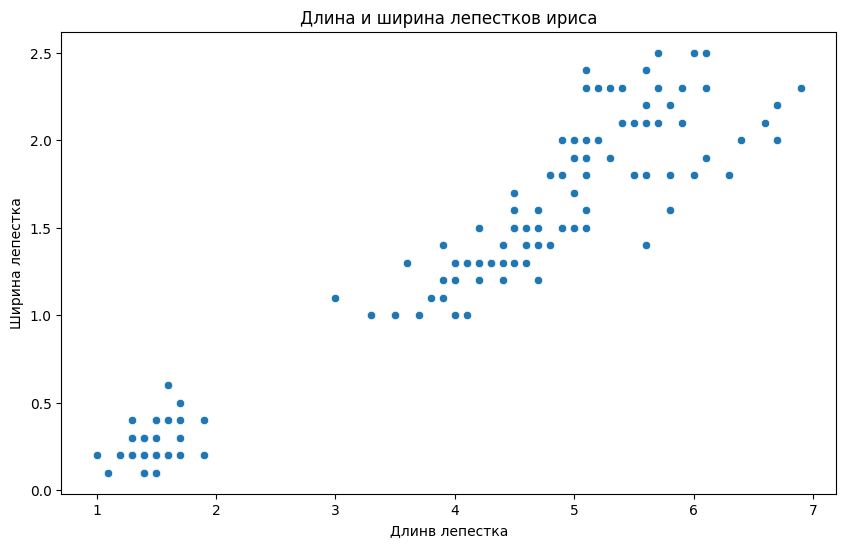

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris, x="petal_length", y="petal_width")
plt.title("Длина и ширина лепестков ириса")
plt.xlabel("Длинв лепестка")
plt.ylabel("Ширина лепестка")
plt.show()

Напишите, какие выводы можно сделать из графика. Чего графику не хватает, чтобы он был информативным?

<font color='red'>ВАШ ОТВЕТ ЗДЕСЬ</font>

Давайте попробуем другие графики для тех же целей из библиотеки seaborn - `sns.jointplot`; кроме того, попробуйте выделить цветом точки на графике в зависимости от вида ириса - воспользуйтесь `sns.facetgrid`. В следующих ячейках выведите эти два графика и проанализируйте.

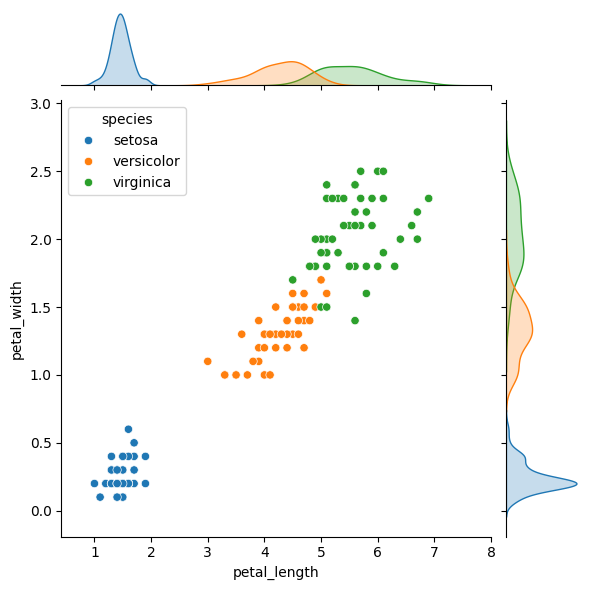

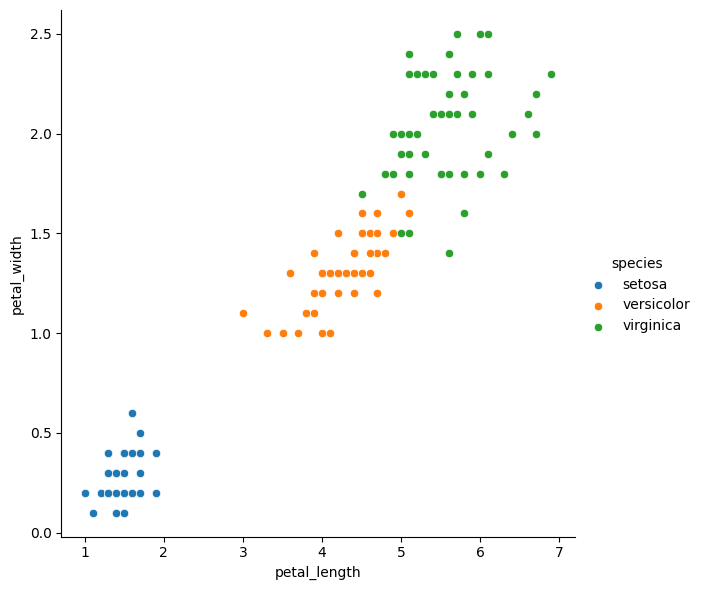

In [21]:
sns.jointplot(data=iris, x="petal_length", y="petal_width", kind="scatter", hue="species")
plt.show()

g = sns.FacetGrid(iris, hue="species", height = 6)
g.map(sns.scatterplot, "petal_length", "petal_width").add_legend()
plt.show()

Какие выводы можно сделать из этих графиков? Какой из 3 методов - scatterplot, jointplot, facetgrid вам кажется лучше?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.2 Графики распределений значений длины лепестка

Постройте график "ящика с усами" - `sns.boxplot` и его аналог - `sns.violinplot`. По оси Ox должны находиться возможные виды ирисов, по оси Oy.

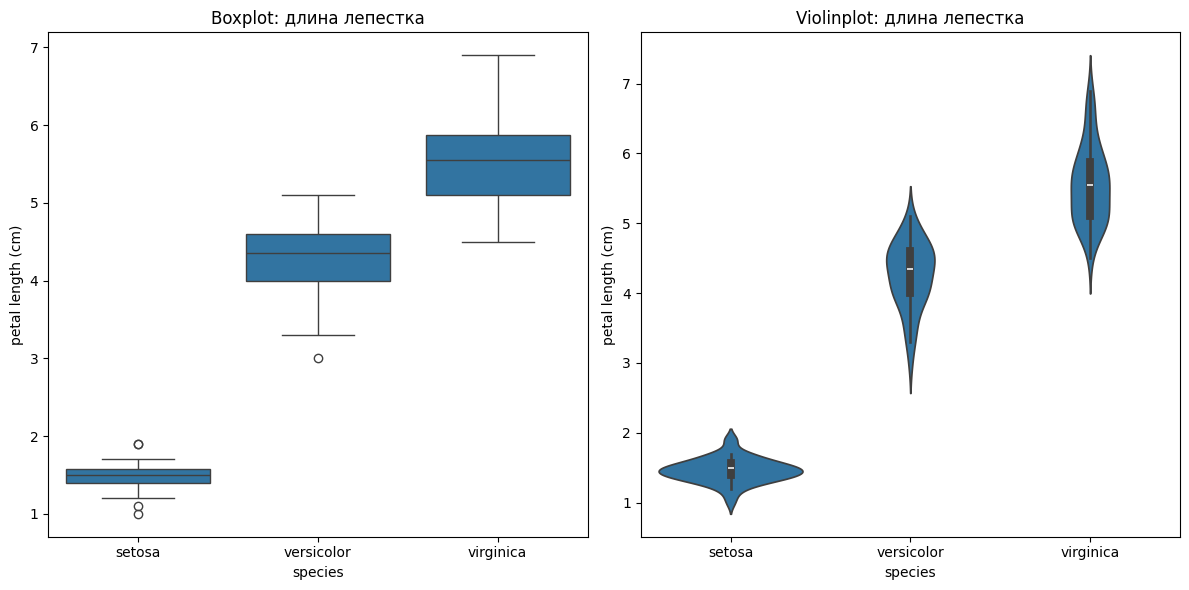

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='species', y=iris.feature_names[2], data=iris_df)
plt.title('Boxplot: длина лепестка')

plt.subplot(1, 2, 2)
sns.violinplot(x='species', y=iris.feature_names[2], data=iris_df)
plt.title('Violinplot: длина лепестка')

plt.tight_layout()
plt.show()

Сравните два вида графиков. Какой более информативный, а какой - более красивый визуально по вашему мнению? Какую информацию мы можем получить из этих графиков?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

## 3.3 Попарные графики взаимосвязи признаков


Давайте попробуем построить большую табличку из графиковв размера 4 на 4, где у нас находятся все возможные пары признаков (длина/ширина лепестка, длина/ширина чашелистика). Для этого воспользуйтесь `sns.pairplot` и не забудьте указать параметр `hue`.

<function matplotlib.pyplot.show(close=None, block=None)>

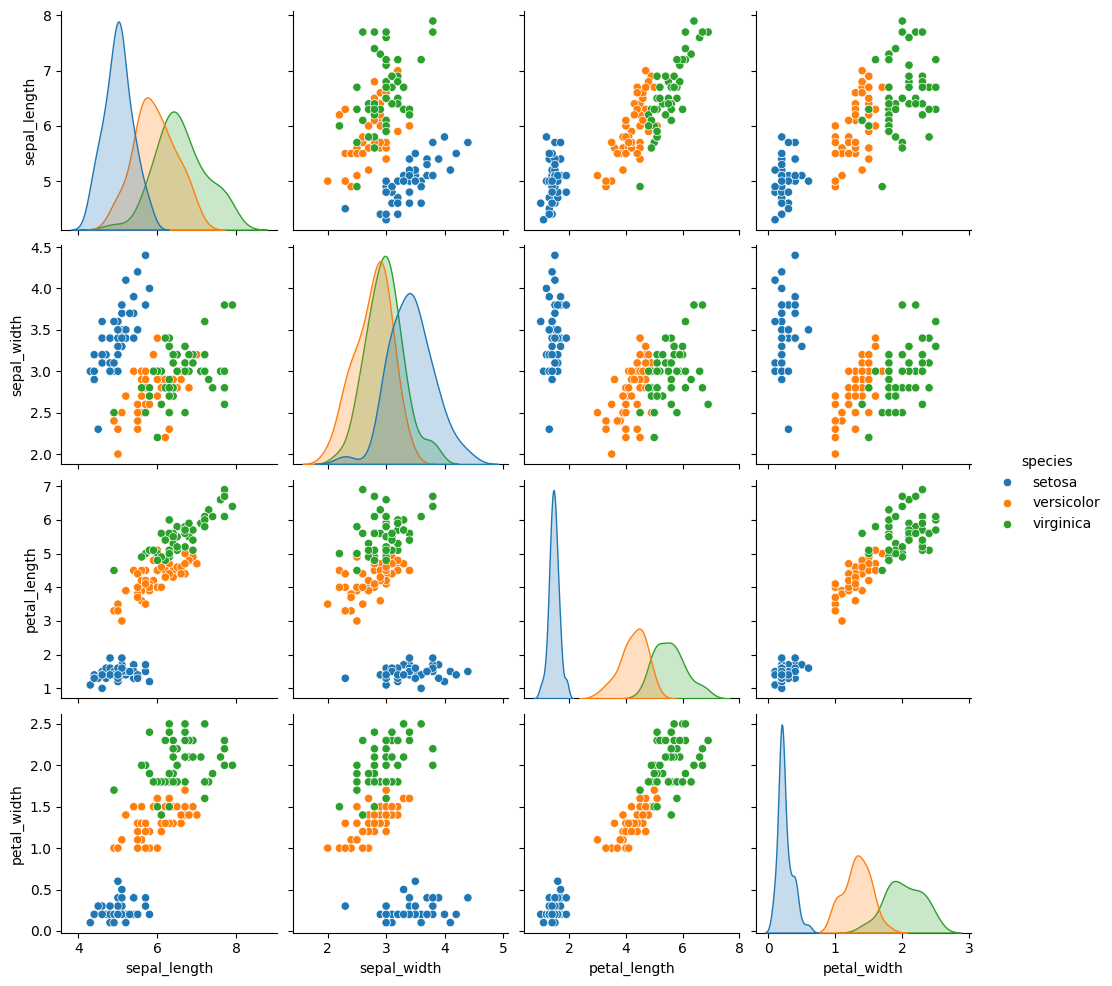

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset

data = sns.load_dataset("iris")

sns.pairplot(data, hue="species")
plt.show

Какую информацию о взаимосвязи признаков вы можете почерпнуть из полученного графика?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Какие графики находятся на диагонали этой таблицы?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>

Попробуй заменить графики на диагонали таблицы на другие, возможно, более информативные (подсказка: в документации у `sns.pairplot` для этого есть специальный параметр). Выведи полученный график.

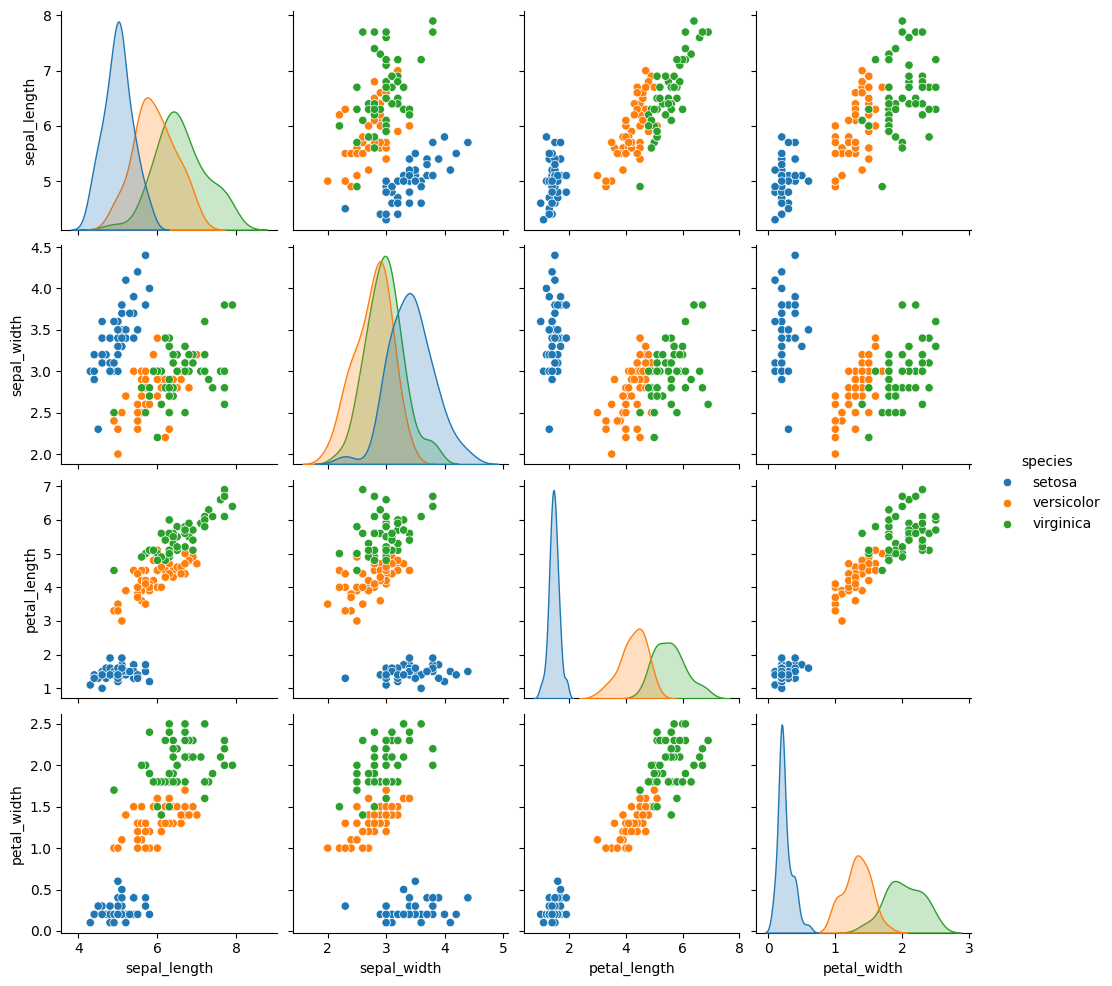

In [27]:
sns.pairplot(data, hue="species", diag_kind="kde")
plt.show()

Какие графики теперь находятся на диагонали таблицы? Получилось ли более информативно?

<font color='red'> ВАШ ОТВЕТ ЗДЕСЬ </font>